# Plot monthly mean AHF
- This script is used to plot monthly mean AHF from simulations and AH4GUC dataset;
- Simulations: CNTL, TRAF at FR-Capitole and UK-Manchester. 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [23]:
df = pd.read_csv('data_for_figure/monthly_mean.csv')
df.head()

,month,case,site,variable,value
0,1,AH4GUC,FR-Capitole,AHF,48.108510
1,1,AH4GUC,FR-Capitole,traffic_contribution,NaN
2,1,AH4GUC,UK-Manchester,AHF,23.916770
3,1,AH4GUC,UK-Manchester,traffic_contribution,NaN
4,1,cntl,FR-Capitole,AHF,19.617936


In [28]:
nrow=1
ncol=2
case_list = ['cntl', 'traffic']
site_list = ['FR-Capitole', 'UK-Manchester']
labelcolor = '#6b6b6b'
linewidth = 0.5
label_list = ['CNTL', 'TRAF']
lc1 = '#d95f02'
lc2 = '#7570b3'
lc = [lc1, lc2]  
month_list = range(1, 13)
vmin = 0
vmax = 50
ax2_vmin= 40
labelfont = 6
padding =4
xwidth = 0.5
pad = 1
handletextpad = 0.5
length = 2
marker='o'
markersize=2
x_offset = 0.1

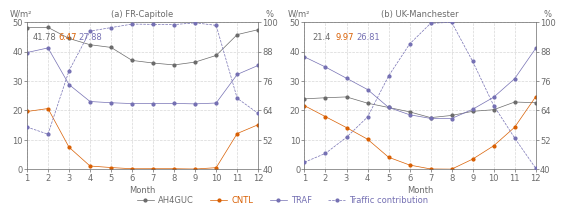

In [31]:
fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(5.5, 2))
ax = axes.flatten()
for i in range(nrow*ncol):
    site = site_list[i]
    df_monthly_site = df[df['site'] ==site]
    df_ah4guc = df_monthly_site[(df_monthly_site['case']=='AH4GUC') & (df_monthly_site['variable']=='AHF')]['value'].values
    ax[i].plot(month_list, df_ah4guc, label='AH4GUC', color=labelcolor, linewidth=linewidth, marker=marker, markersize=markersize)
    ax[i].text(0.075, 0.9, np.round(df_ah4guc.mean(),2), fontsize=labelfont, ha='center', va='center', transform=ax[i].transAxes, color=labelcolor)
    for j in range(len(case_list)):
        df_case = df_monthly_site[df_monthly_site['case'] == case_list[j]]
        df_case_var = df_case[df_case['variable']=='AHF']['value'].values
        ax[i].plot(month_list, df_case_var, label=label_list[j], linewidth=linewidth, color=lc[j], marker=marker, markersize=markersize)   
        ax[i].text(0.075 + x_offset*(j+1), 0.9, np.round(df_case_var.mean(),2), fontsize=labelfont, ha='center', va='center', transform=ax[i].transAxes, color=lc[j])
    ax[i].set_xticks(month_list)
    ax[i].set_xticklabels(month_list)
    ax[i].set_xlim(1, 12)    
    ax[i].set_ylim(0, vmax)
    ax[i].set_yticks(range(0, vmax+1, 10))
    ax[i].set_yticklabels(range(0, vmax+1, 10))
    ax[i].set_title(f'({string.ascii_lowercase[i]}) {site_list[i]}',fontsize=labelfont,color=labelcolor, pad = padding)      
    ax[i].set_ylabel('W/m²' ,labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
    ax[i].yaxis.set_label_coords(-0.025, 1.025)
    for spine in ax[i].spines.values():
        spine.set_linewidth(xwidth)
        spine.set_edgecolor(labelcolor)
    ax[i].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=labelcolor, color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    ax[i].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)   
    ax[i].grid(True,linestyle='--',linewidth=0.5, alpha=0.5)
    ax2 = ax[i].twinx()
    ax2.plot(month_list,df_monthly_site[(df_monthly_site['case']=='traffic') & (df_monthly_site['variable']=='traffic_contribution')]['value'].values, linewidth=linewidth, color=lc2, marker=marker, markersize=markersize, linestyle='--', label='Traffic contribution')  
    ax2.set_ylim(ax2_vmin, 100)
    ax2.set_yticks(range(ax2_vmin, 101, 12))
    ax2.set_yticklabels(range(ax2_vmin, 101, 12))
    ax2.set_ylabel('%' ,labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
    ax2.yaxis.set_label_coords(1.05, 1.085)
    for spine in ax2.spines.values():
        spine.set_visible(False)
    ax2.tick_params(axis='y', which='both', left=False, right=True, labelright=True, labelcolor=labelcolor, color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)    
    ax[i].set_xlabel('Month', labelpad=2.5, fontsize=labelfont, color=labelcolor)
lines1, labels1 = ax[0].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
legend = fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.015), loc='lower center', frameon=False, handletextpad=handletextpad, fontsize=labelfont, ncol=4)
for i, text in enumerate(legend.get_texts()):
    text.set_color(([labelcolor] + lc + [lc2])[i])
plt.subplots_adjust(left=0.035, right=0.96, bottom=0.2, top=0.935, wspace=0.2)
fig.savefig(f'monthly_ahf.png', dpi=300)  
fig.savefig(f'monthly_ahf.pdf', dpi=600)    

# description

In [12]:
df_fr_traf = df[(df['case'] == 'traffic') & (df['site'] == 'FR-Capitole') & (df['variable']=='AHF')].copy()
df_fr_traf

,month,case,site,variable,value
8,1,traffic,FR-Capitole,AHF,39.675405
20,2,traffic,FR-Capitole,AHF,41.236283
32,3,traffic,FR-Capitole,AHF,28.772330
44,4,traffic,FR-Capitole,AHF,23.011282
56,5,traffic,FR-Capitole,AHF,22.592838
68,6,traffic,FR-Capitole,AHF,22.310314
80,7,traffic,FR-Capitole,AHF,22.333174
92,8,traffic,FR-Capitole,AHF,22.352902
104,9,traffic,FR-Capitole,AHF,22.208823
116,10,traffic,FR-Capitole,AHF,22.501300
